In [1]:
pwd

'/Users/zofia/github/DFM/interactivePython'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os
sys.path.append('/Users/zofia/github/DFM/srcDiffmap')

import mdtraj as md

import integrator
import sampler #as sampler
import model #as model
import diffusionmap as dm
import statistics_dfm as stat

import numpy as np
from simtk import openmm, unit
from openmmtools.constants import kB

import model
mdl=model.Model('Dimer')
print (mdl.x_unit)
print('System has %d particle(s)' % mdl.system.getNumParticles())
print (mdl.testsystem.positions)
X0=mdl.testsystem.positions.value_in_unit(mdl.x_unit)
print('Initial distance is %f' % np.linalg.norm(X0[0,:]-X0[ 1,:]))

algoVect=0

# parameters
# this is the target temperature 
T=100.0
temperature =  T * unit.kelvin#300 * unit.kelvin
kT = kB * temperature


gamma = 1.0 / unit.picosecond
dt = 2.0 * unit.femtosecond

TemperatureTAMDFactor=30.0
massScale=50.0

gammaScale=100.0
kappaScale=1000.0

print("TemperatureTAMDFactor = " + repr(TemperatureTAMDFactor))
temperatureAlpha= (T*TemperatureTAMDFactor)* unit.kelvin

print('Gamma is '+repr(gamma))
print('Temperature is '+repr(temperature))
print('Temperature TAMD '+repr(TemperatureTAMDFactor)+'xTemperature')
print('Mass alpha is '+repr(massScale)+'x Mass')



# simulation class sampler takes integrator class with chosen parameters as input
integrator=integrator.Integrator( model=mdl, gamma=gamma, temperature=temperature, temperatureAlpha=temperatureAlpha, dt=dt, massScale=massScale, gammaScale=gammaScale, kappaScale=kappaScale)
samplerAlgo=sampler.Sampler(model=mdl, integrator=integrator, algorithm=0, dataFileName='Data')

# nrSteps is number of steps for each nrRep , and iterate the algo nrIterations times - total simulation time is nrSteps x nrIterations
# nrSteps=args.nrSteps
# nrEquilSteps = 10 #10000
# nrIterations=args.niterations
# nrRep=args.nreplicas

algoNames=samplerAlgo.algorithmName

simulatedTemperature=100



Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)
Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)
angstrom
System has 2 particle(s)
[[ 0.          0.          0.        ]
 [ 1.54999995  0.          0.        ]] A
Initial distance is 1.550000
TemperatureTAMDFactor = 30.0
Gamma is Quantity(value=1.0, unit=/picosecond)
Temperature is Quantity(value=100.0, unit=kelvin)
Temperature TAMD 30.0xTemperature
Mass alpha is 50.0x Mass
169.844252994 K


In [3]:
colorList=['red', 'blue', 'black', 'green']
    
# copy values for the two states from above
min1=1.55*model.unit.angstroms
min2=2.55*model.unit.angstroms


In [8]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/T100InitialCondition/Traj/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

X_IC=X


100
3


In [9]:
#---------------- load trajectories: for example from simulation at higher temperature
import glob
numpy_vars = []
for np_name in glob.glob('/Users/zofia/github/DFM/Data/Std/Traj/T100_ICref/*.h5'):
    numpy_vars.append(md.load(np_name))

traj = numpy_vars
print(len(traj))


import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

Xref=X



100
3


3
(1000, 2, 3)
(1000,)


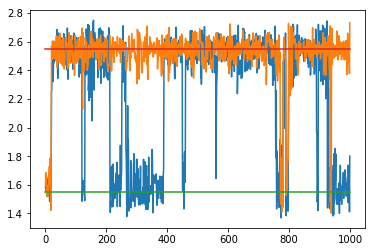

Initial radius: 1.600069090639203
Mean radius: 2.4986851441827458


In [15]:

import mdtraj as md
Xmdtraj=list()
for i in range(len(traj)):
    Xmdtraj.append(md.Trajectory(traj[i].xyz, mdl.testsystem.topology) )

print(Xmdtraj[0].xyz.shape[2])
L=int(Xmdtraj[0].xyz.shape[0]*len(traj))
nrP=int(Xmdtraj[0].xyz.shape[1])
D=int(Xmdtraj[0].xyz.shape[2])
X=np.zeros((L, nrP, D))
for i in range(0,len(Xmdtraj)):
        X[i*len(Xmdtraj[i].xyz):(i+1)*len(Xmdtraj[i].xyz),:,:]=Xmdtraj[i].xyz

print(X.shape)

#---------------- radius 
rref=np.linalg.norm(Xref[:,0,:]-Xref[:,1,:], 2, axis=1)
rIC=np.linalg.norm(X_IC[:,0,:]-X_IC[:,1,:], 2, axis=1)


print(r.shape)


plt.plot(range(len(rIC)), rIC)
plt.plot(range(len(rref)), rref)
plt.plot(range(len(r)), np.ones(len(r))*min1)
plt.plot(range(len(r)), np.ones(len(r))*min2)
plt.show()

print("Initial radius: "+repr(np.linalg.norm(X[0, 0,:]-X[0, 1,:])))
print("Mean radius: " +repr(np.mean(r)))


In [16]:
#---------- VISUALISATION OF THE MOLECULE
#align according to first frame
traj[0]=traj[0].superpose(traj[0][0])
tpl=traj[0].topology
print(tpl)
import nglview as nv
view = nv.show_mdtraj(traj[0])

view.add_representation('spacefill', selection='all' )
view.frame = 10
view

#--- saving as gif: does not work :(
# from nglview.contrib.movie import MovieMaker
# movie = MovieMaker(view, output='my.gif')
# movie.make()


<mdtraj.Topology with 1 chains, 1 residues, 2 atoms, 0 bonds>


A Jupyter Widget

In [17]:
def plotResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    print(freeEnergyUnWeighted)
    freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergy, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()


    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
def plotAndSaveResults(freeEnergyUnWeighted, freeEnergyWeighted, V1, lm, Epot, r):
    #print(freeEnergyUnWeighted)
    #freeEnergy=freeEnergyUnWeighted
    #plt.scatter(v1TMDiffmap, Epot)
    plt.plot(V1[lm], freeEnergyUnWeighted, '*-b')
    plt.xlabel('V1')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()#('V1_freeEn.png')

    plt.plot(r[lm], freeEnergyWeighted, '*-b')
    plt.plot(r[lm], freeEnergyUnWeighted, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()
    #plt.save('r_freeEn.png')

    plt.scatter(  V1, Epot)
    plt.plot( V1[lm],Epot[lm], '*-r')
    plt.xlabel('V1')
    plt.ylabel('potential energy')
    plt.show()
    
    
    #plt.save('V1_ePot.png')

    plt.scatter(  r, Epot, c=V1)
    plt.plot(  r[lm], Epot[lm], '-*r')
    plt.xlabel('r')
    plt.ylabel('potential energy')
    plt.show()
   
    plt.scatter(  r, Epot, c=V1)
    #plt.plot(  r[lm], Epot[lm], '-*r')
    plt.colorbar()
    plt.xlabel('radius')
    plt.ylabel('potential energy')
    plt.show()
   
    #plt.save('r_ePot.png')

    plt.scatter(  r, V1)
    plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('r')
    plt.ylabel('V1')
    plt.show()
    
    plt.scatter(  r, V1)
    #plt.plot(  r[lm], V1[lm], '*-r')
    plt.xlabel('radius')
    plt.ylabel('dominant eigenvector')
    plt.show()
    
    plt.scatter(  r,   Epot, c=V1)
    plt.plot(  r[lm], freeEnergyUnWeighted, '-*b')
    plt.xlabel('radius')
    plt.legend(['dominant eigenvector', 'free energy'])
    plt.show()
    #plt.save('r_V1.png')
    
def plotCompareResults(fe1, fe2, v11 , v12,  lm1, lm2, r1, r2):
    #print(freeEnergyUnWeighted)
    
  
    plt.plot(r1[lm1], fe1, '*-b')
    plt.plot(r2[lm2], fe2, '*-r')
    plt.xlabel('r')
    plt.ylabel('Free energy ln(pi(V1(x)))')
    plt.show()



In [18]:
import imp
imp.reload(sampler)
imp.reload(dm)
imp.reload(stat)

def FE(tr, eps, numberOfLandmarks, smpl, model, T, method): 
        
        tr_orig=tr
        
        tmp=md.Trajectory(tr, model.testsystem.topology)
        tmp = tmp.superpose(tmp[0])
        #------ reshape data ------------------------------

        tmp =  tmp.xyz.reshape((tmp.xyz.shape[0], tmp.xyz.shape[1]*tmp.xyz.shape[2]))
                
        tr=tmp
        v1, qTarget, qEmp, Epot, kernel=sampler.dominantEigenvectorDiffusionMap(tr, eps, smpl, T, method)
        
        #qTargetNormalized = qTarget/np.sum(qTarget)
        
        #get landmarks
        lm, levelsets, linspV = dm.get_landmarks(tr, numberOfLandmarks, qTarget, v1, Epot, getLevelSets=True)
        
        levelsets, levels = dm.get_levelsets(tr, numberOfLandmarks, qTarget, v1);
        
        tr =  tr.reshape((tr_orig.shape[0], tr_orig.shape[1],tr_orig.shape[2]))
        
        return tr, levelsets, v1, lm, qEmp, Epot, qTarget


def computeFreeEnergyAtLandmarkedPoint(qTarget, qEmp, levelsets, method='weighted'):
      
        if(method=='weighted'):
            weight, Ntilde = stat.compute_weight_target_distribution(qTarget, qEmp)
        
        
        K=len(levelsets)
        
        freeEnergy=np.zeros(K)
        h=np.zeros(K)

        for k in range(0,K):
            # simple histogram
            if(method == 'raw'):
                h[k] = np.sum(len(levelsets[k]))
            elif(method=='weighted'):
#              # unbiased histogram- we can use weights!!
                h[k] = np.sum(weight[levelsets[k]])
            
        for k in range(0,K):
            if(h[k] == 0):
                freeEnergy[k] = 0 # if the bin is empty set 0
            else:
                if(method == 'raw'):
                    freeEnergy[k] = -np.log(h[k]/sum(h))
                elif(method=='weighted'):
#              
                    freeEnergy[k] =  -np.log( h[k]/sum(h) / Ntilde)
                
                
        
                
        if(method=='weighted'):
            return freeEnergy, weight, Ntilde
        else:
            return freeEnergy



Dimer model: double-well with 2 states
State1: r=Quantity(value=1.55, unit=angstrom)
State2: r=Quantity(value=2.55, unit=angstrom)


In [26]:
numberOfLandmarks=10
epsilon=1

Xshort=X_IC
while(len(Xshort)>2000):
    Xshort=Xshort[::2]
#Xshort=X[::10]
print("Shape of input data: "+repr((Xshort.shape)))

# note that samplerAlgo.T gives the target temperature from the at the beginning initialized class
print("Target temperature is "+repr(samplerAlgo.T))


# target temperature T= low temperature 100K
XspTGT,levelsetsTGT, V1TGT, lmTGT, qEmpTGT, EpotTGT, qTargetTGT =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')




Shape of input data: (1000, 2, 3)
Target temperature is Quantity(value=100.0, unit=kelvin)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


In [27]:

print("Target temperature is "+repr(samplerAlgo.T))
#qTargetTGT=np.exp(-EpotTGT/samplerAlgo.T)

freeEnergyWeightedTGT, weightTGT, NtildeTGT= computeFreeEnergyAtLandmarkedPoint(qTargetTGT, qEmpTGT, levelsetsTGT, method='weighted')
freeEnergyRawTGT= computeFreeEnergyAtLandmarkedPoint(qTargetTGT, qEmpTGT, levelsetsTGT, method='raw')


rTGT=np.linalg.norm(XspTGT[:,0,:]-XspTGT[:,1,:], 2, axis=1)



Target temperature is Quantity(value=100.0, unit=kelvin)


In [28]:
print(freeEnergyRawTGT)

[ 2.53004365  1.96657429  2.69097401  3.91633801  5.44781438  5.91781801
  4.69404258  2.68306883  1.05336522  1.34931181]


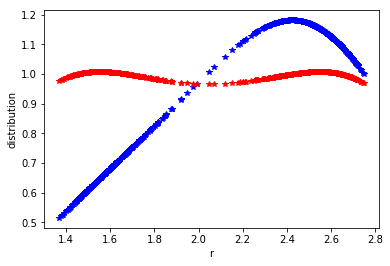

In [29]:
#qTarget=np.exp(-Epot/samplerAlgo.T)
plt.plot(rTGT, qEmpTGT/np.mean(qEmpTGT), '*b')
plt.plot(rTGT, qTargetTGT/np.mean(qTargetTGT), '*r')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

In [30]:
#simulated temperature 
print("Simulated temperature is "+repr(simulatedTemperature))

XspST,levelsetsST, V1ST, lmST, qEmpST, EpotST, qTargetST =FE(Xshort, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, simulatedTemperature, 'TMDiffmap')#'TMDiffmap')#'Diffmap')


print("Target temperature is "+repr(simulatedTemperature))
#qTargetST=np.exp(-EpotST/simulatedTemperature)

freeEnergyWeightedST, weightST, NtildeST= computeFreeEnergyAtLandmarkedPoint(qTargetST, qEmpST, levelsetsST, method='weighted')
freeEnergyRawST= computeFreeEnergyAtLandmarkedPoint(qTargetST, qEmpST, levelsetsST, method='raw')


rST=np.linalg.norm(XspST[:,0,:]-XspST[:,1,:], 2, axis=1)




Simulated temperature is 100
Temperature in dominantEigenvectorDiffusionMap is 100
constructing neighbor graph
neighbor graph done
Target temperature is 100


[ 2.53004365  1.96657429  2.69097401  3.91633801  5.44781438  5.91781801
  4.69404258  2.68306883  1.05336522  1.34931181]


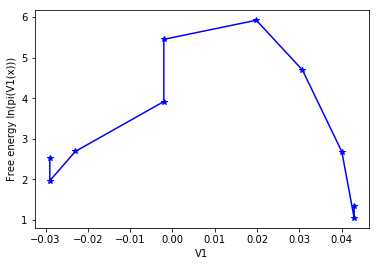

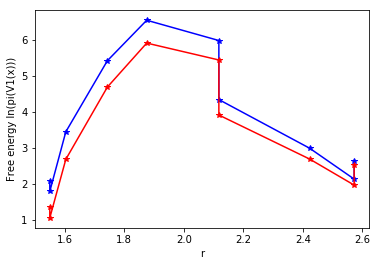

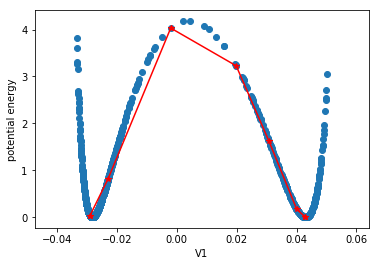

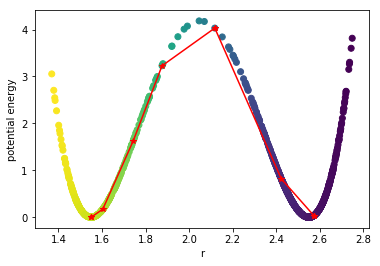

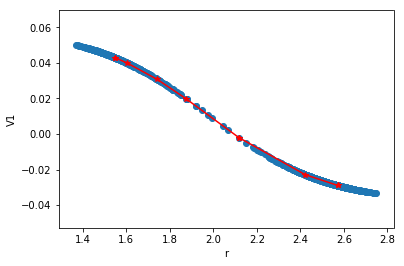

[ 2.53004365  1.96657429  2.69097401  3.91633801  5.44781438  5.91781801
  4.69404258  2.68306883  1.05336522  1.34931181]


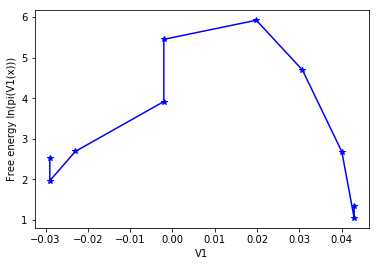

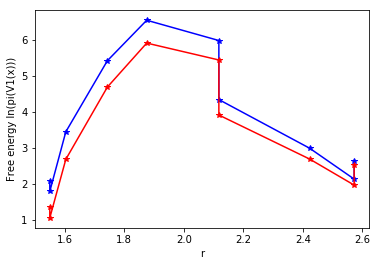

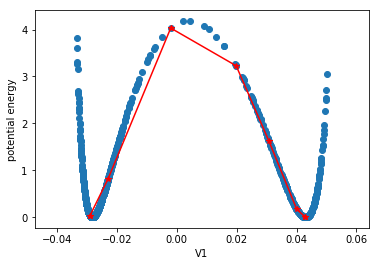

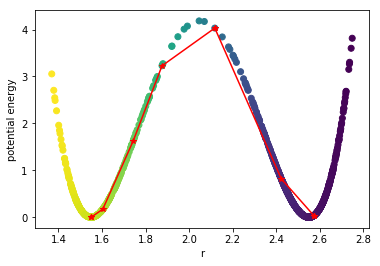

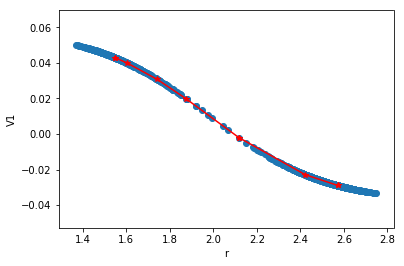

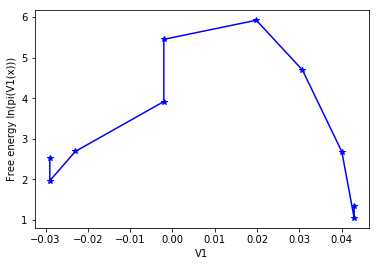

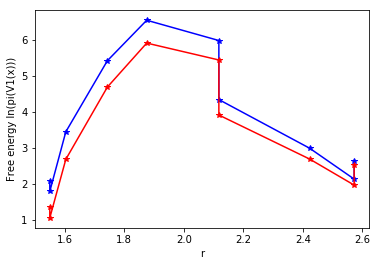

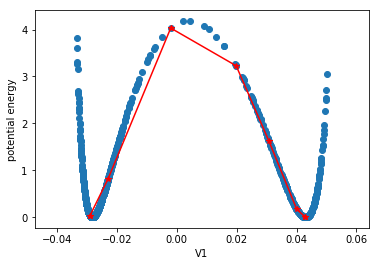

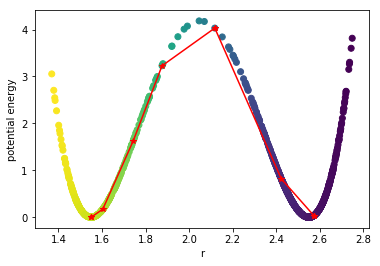

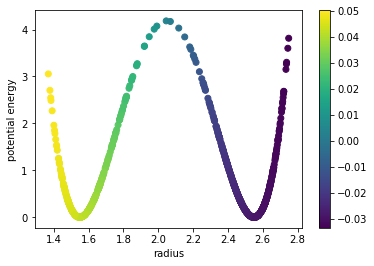

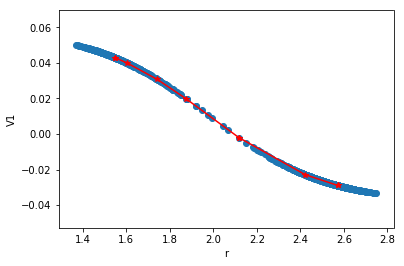

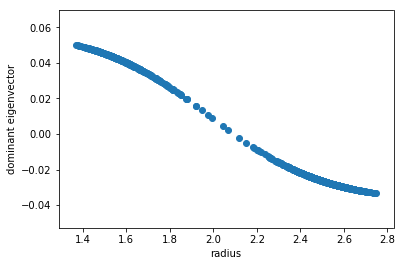

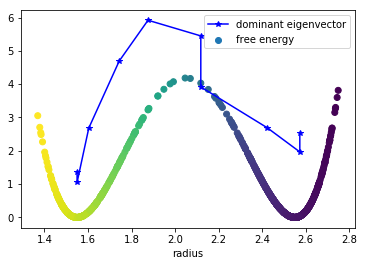

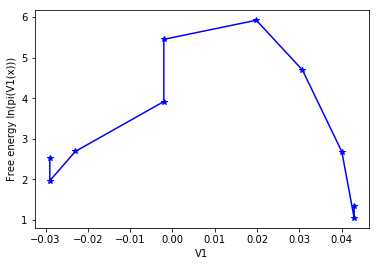

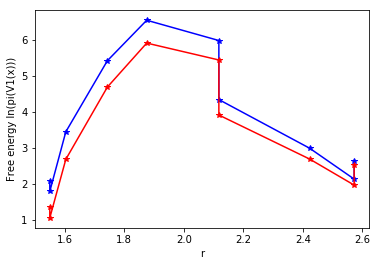

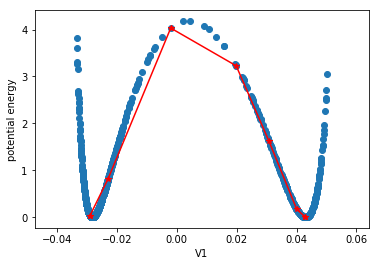

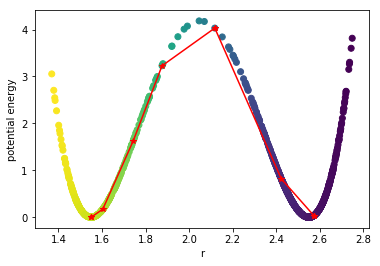

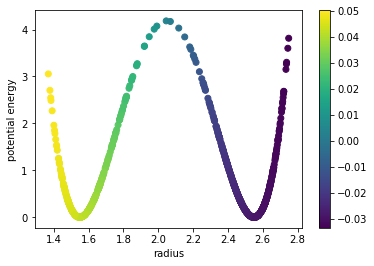

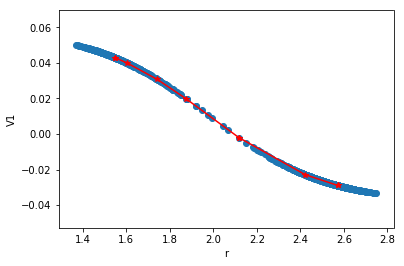

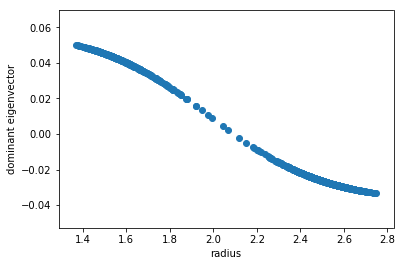

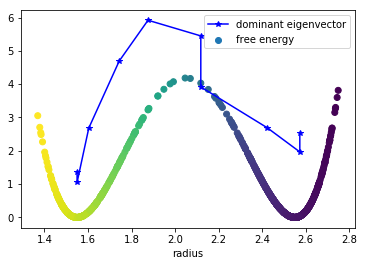

In [31]:
plotResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
plotResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

plotAndSaveResults(freeEnergyRawTGT, freeEnergyWeightedTGT, V1TGT, lmTGT, EpotTGT, rTGT)
plotAndSaveResults(freeEnergyRawST, freeEnergyWeightedST, V1ST, lmST, EpotST, rST)

In [32]:
# Xmd = md.Trajectory(Xshort,  mdl.testsystem.topology)

# rmsd = md.rmsd(Xmd, Xmd[0])
# print(rmsd[0])

# plt.plot(rmsd[lm], freeEnergy, '*-b')
# #plt.plot(rmsd, r, '*b')
# plt.xlabel('rmsd')
# plt.ylabel('r')
# plt.show()


In [33]:
maximalDataLength=2000

Xshortref=Xref
while(len(Xshortref)>maximalDataLength):
    Xshortref=Xshortref[::2]
#Xshort=X[::10]
print("Shape of input data: "+repr((Xshortref.shape)))



Xspref,levelsetsref, V1ref, lmref, qEmpref, Epotref, qTargetref =FE(Xshortref, epsilon, numberOfLandmarks, samplerAlgo, samplerAlgo.model, samplerAlgo.T, 'TMDiffmap')#'TMDiffmap')#'Diffmap')




Shape of input data: (1000, 2, 3)
Temperature in dominantEigenvectorDiffusionMap is Quantity(value=100.0, unit=kelvin)
constructing neighbor graph
neighbor graph done


Target temperature is Quantity(value=100.0, unit=kelvin)


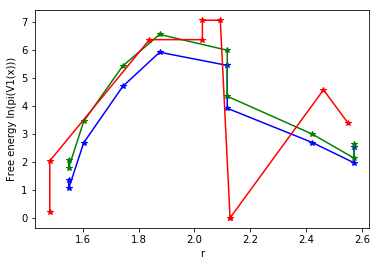

In [34]:
print("Target temperature is "+repr(samplerAlgo.T))
#qTargetref=np.exp(-Epotref/samplerAlgo.T)
#qTargetref=qTargetref/np.mean(qTargetref)
freeEnergyWeightedref, weightref, Ntilderef= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='weighted')
freeEnergyRawref= computeFreeEnergyAtLandmarkedPoint(qTargetref, qEmpref, levelsetsref, method='raw')

r=np.linalg.norm(Xshort[:,0,:]-Xshort[:,1,:], 2, axis=1)
rref=np.linalg.norm(Xshortref[:,0,:]-Xshortref[:,1,:], 2, axis=1)

freeEnergy=freeEnergyRawTGT
freeEnergyref=freeEnergyRawref

plt.plot(rTGT[lmTGT], freeEnergyRawTGT, '*-b')
plt.plot(rST[lmST], freeEnergyWeightedST, '*-g')
plt.plot(rref[lmref], freeEnergyref, '*-r')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()


In [35]:
#plotResults(freeEnergyUnWeightedref, freeEnergyWeightedref, V1ref, lmref, Epotref, rref)

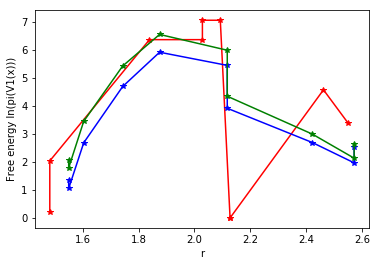

In [36]:
plt.plot(rref[lmref], freeEnergyRawref, '*-r')
plt.plot(rTGT[lmTGT], freeEnergyRawTGT, '*-b')
plt.plot(rST[lmST], freeEnergyWeightedST, '*-g')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

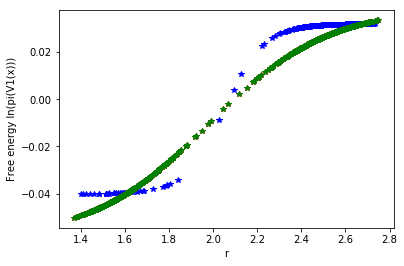

In [40]:
plt.plot(rref, V1ref, '*b')
plt.plot(rTGT, -(V1TGT), '*r')
plt.plot(rST, -V1ST, '*g')
plt.xlabel('r')
plt.ylabel('Free energy ln(pi(V1(x)))')
plt.show()

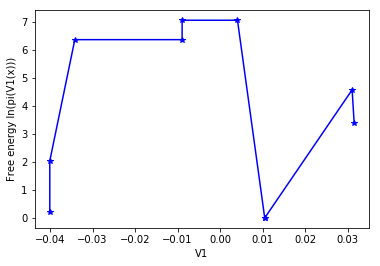

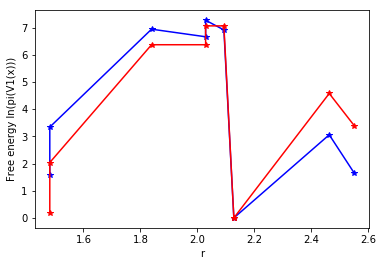

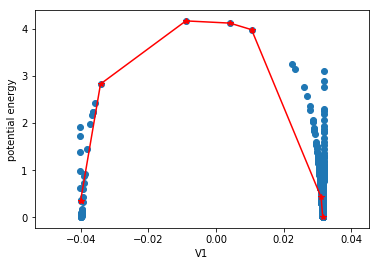

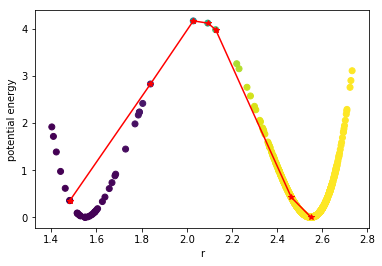

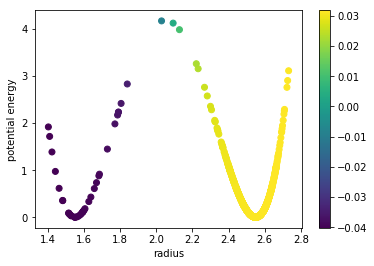

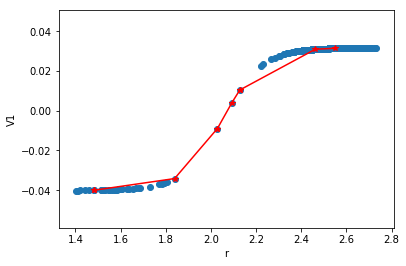

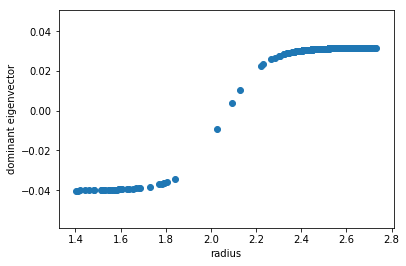

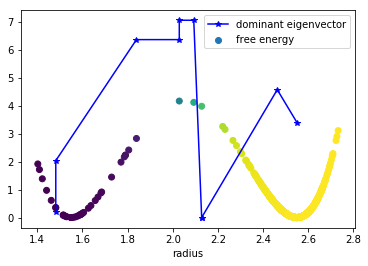

In [38]:
plotAndSaveResults(freeEnergyRawref, freeEnergyWeightedref, V1ref, lmref, Epotref, rref)

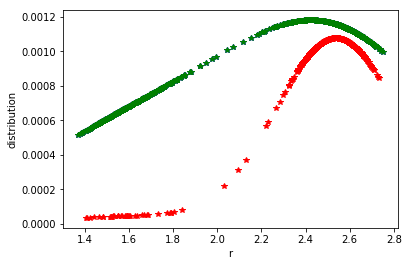

1.0


In [44]:
plt.plot(rref, qEmpref/np.sum(qEmpref), '*r')
plt.plot(rST, qEmpST/np.sum(qEmpST), '*b')
plt.plot(rTGT, qEmpTGT/np.sum(qEmpTGT), '*g')
#plt.plot(rTGT, qTargetTGT/np.mean(qTargetTGT), '*r')
plt.xlabel('r')
plt.ylabel('distribution')
plt.show()

print(np.sum(qEmpref/np.sum(qEmpref)))